In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster, metrics

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Load from your CSV file
df = pd.read_csv("iris.csv")
cols = df.columns[:-1]
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Feature Scaling
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

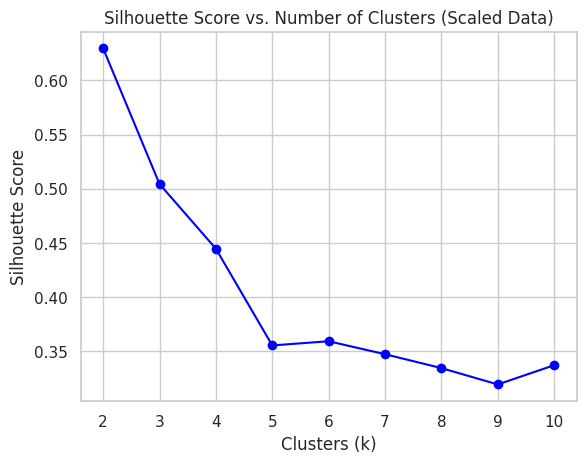

In [9]:
scaled_silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans_model_scaled = cluster.KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans_model_scaled.fit(X_scaled)
    scaled_cluster_labels = kmeans_model_scaled.labels_
    scaled_silhouette = metrics.silhouette_score(X_scaled, scaled_cluster_labels)
    scaled_silhouette_scores.append(scaled_silhouette)

# Plot silhouette scores (scaled data)
plt.plot(range(2, 11), scaled_silhouette_scores, marker='o', color='blue')
plt.title("Silhouette Score vs. Number of Clusters (Scaled Data)")
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

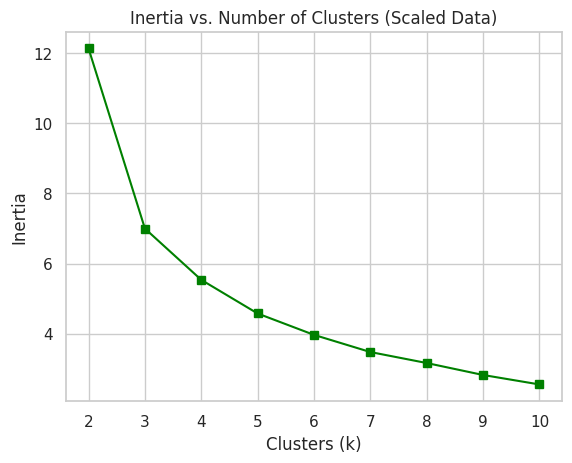

In [10]:
scaled_inertia_values = []
for num_clusters in range(2, 11):
    kmeans_model_inertia = cluster.KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans_model_inertia.fit(X_scaled)
    scaled_inertia_values.append(kmeans_model_inertia.inertia_)

plt.plot(range(2, 11), scaled_inertia_values, marker='s', color='green')
plt.title("Inertia vs. Number of Clusters (Scaled Data)")
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [7]:
X_unscaled = df[cols].values

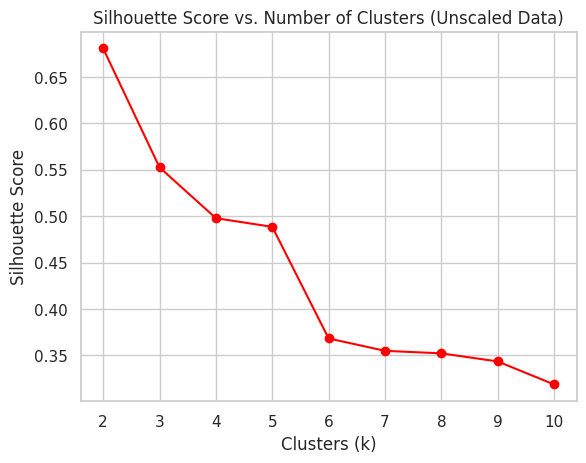

In [11]:
unscaled_silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans_model_unscaled = cluster.KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans_model_unscaled.fit(X_unscaled)
    unscaled_cluster_labels = kmeans_model_unscaled.labels_
    unscaled_silhouette = metrics.silhouette_score(X_unscaled, unscaled_cluster_labels)
    unscaled_silhouette_scores.append(unscaled_silhouette)

plt.plot(range(2, 11), unscaled_silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score vs. Number of Clusters (Unscaled Data)")
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

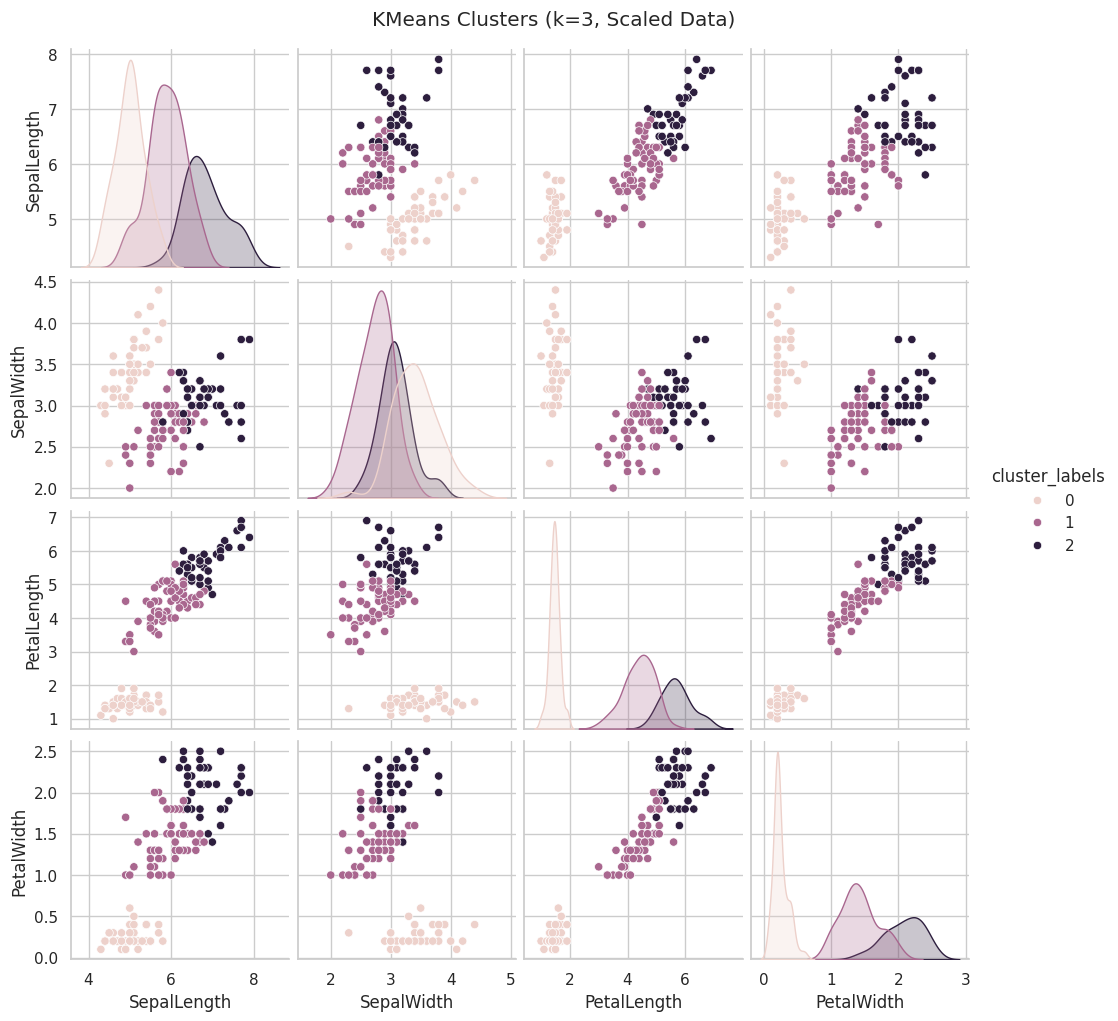

In [12]:
optimal_k = 3
kmeans_scaled = cluster.KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster_labels'] = kmeans_scaled.fit_predict(X_scaled)

sns.pairplot(df, vars=cols, hue='cluster_labels')
plt.suptitle("KMeans Clusters (k=3, Scaled Data)", y=1.02)
plt.show()

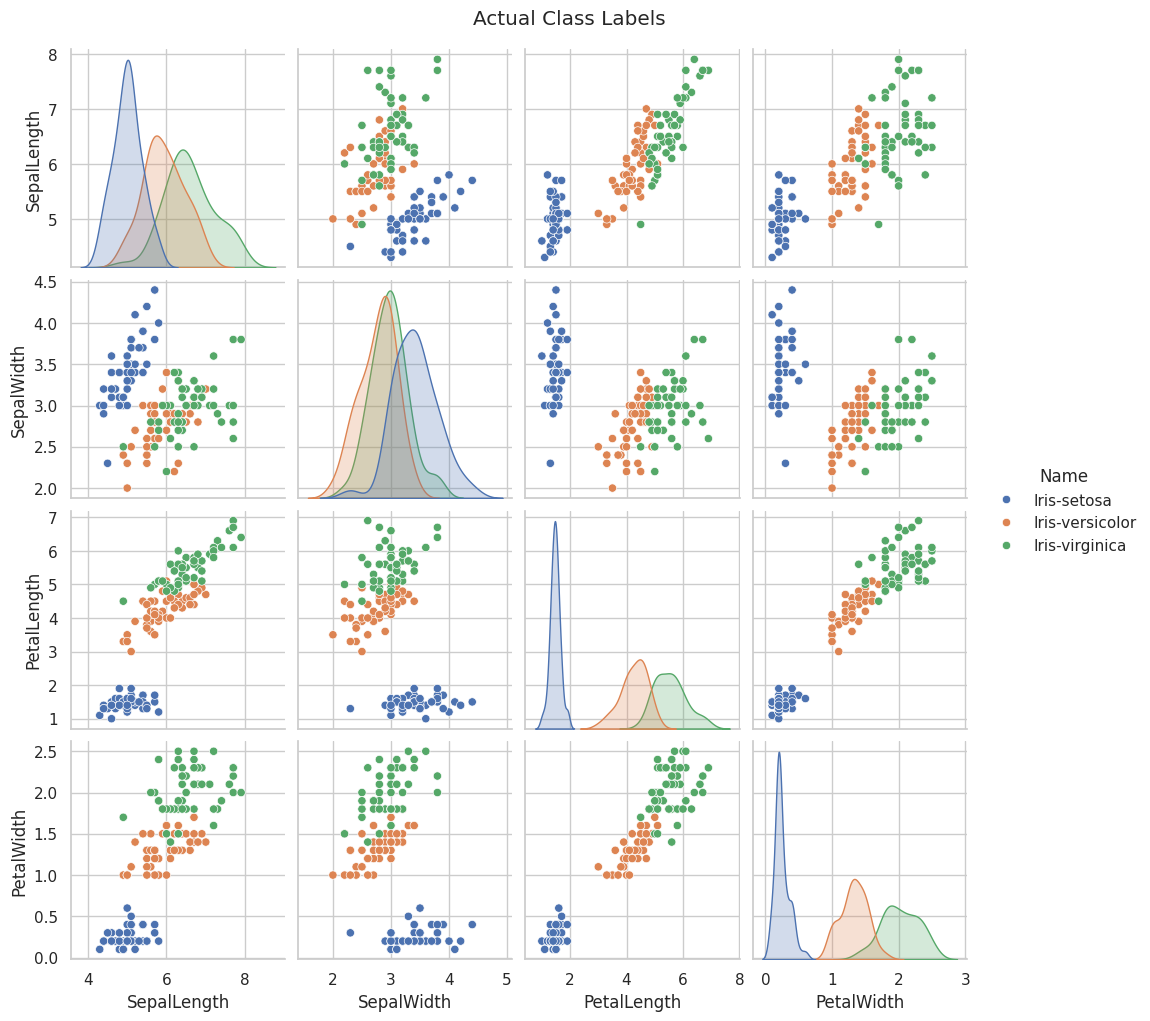

In [13]:
sns.pairplot(df, vars=cols, hue='Name')
plt.suptitle("Actual Class Labels", y=1.02)
plt.show()